# Modeling

In the previous section, dummy features were generated from categorical features, and the numeric features underwent standardization. Additionally, the dataset was divided into training and testing sets to assess the model performance. In this notebook, machine learning models will be built with the aim of predicting the "Number of Orders" and evaluating their performance.

The following models will be conducted :

1-Linear Regression 

2-Decision Tree 

3-Random Forest 

4-XGBoost


## Imports

In [173]:
#Import pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical, Space
import time
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest,f_regression, mutual_info_regression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
#from sklearn.tree import export_graphviz 
#from IPython.display import Image
#from sklearn.preprocessing import StandardScaler
#from sklearn.model_selection import train_test_split
#from library.sb_utils import save_file

## 2-Load the data


In [113]:
# Load the data contains orders, fulfilment centers, meal info, train, test sets
food_orders = pd.read_csv('../Data/food_data_merged.csv')
food_orders_c = pd.read_csv('../Data/food_data_merged_c.csv')
food_orders_test=pd.read_csv('../Data/food_data_merged_test.csv')
X_train=pd.read_csv('../Data/X_train.csv')
X_test=pd.read_csv('../Data/X_test.csv')
y_train=pd.read_csv('../Data/y_train.csv')
y_test=pd.read_csv('../Data/y_test.csv')

In [114]:
#use the info method to see a summary of the data
food_orders_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423727 entries, 0 to 423726
Data columns (total 30 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     423727 non-null  int64  
 1   week                   423727 non-null  int64  
 2   center_id              423727 non-null  int64  
 3   meal_id                423727 non-null  int64  
 4   checkout_price         423727 non-null  float64
 5   base_price             423727 non-null  float64
 6   emailer_for_promotion  423727 non-null  int64  
 7   homepage_featured      423727 non-null  int64  
 8   num_orders             423727 non-null  int64  
 9   city_code              423727 non-null  int64  
 10  region_code            423727 non-null  int64  
 11  op_area                423727 non-null  float64
 12  C_TYPE_B               423727 non-null  int64  
 13  C_TYPE_C               423727 non-null  int64  
 14  C_Biryani              423727 non-nu

In [115]:
#use the head method to see the first several rows of the data
food_orders_c.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,...,C_Pizza,C_Rice Bowl,C_Salad,C_Sandwich,C_Seafood,C_Soup,C_Starters,C_Indian,C_Italian,C_Thai
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,...,0,0,0,0,0,0,0,0,0,1
1,1044078,1,39,2290,301.73,299.73,0,0,419,526,...,0,1,0,0,0,0,0,1,0,0
2,1272063,1,65,2290,305.58,306.58,0,0,878,602,...,0,1,0,0,0,0,0,1,0,0
3,1364972,1,43,2290,279.39,279.39,0,0,944,590,...,0,1,0,0,0,0,0,1,0,0
4,1363806,1,80,2290,311.43,311.43,0,0,446,604,...,0,1,0,0,0,0,0,1,0,0


## 1-Linear Regression

We begin with the linear regression model.
- Linear regression is a simple and interpretable model that can provide baseline performance.
- It assumes a linear relationship between the features and the target variable, which may not always hold true, but it's a good starting point for modeling.
- It can provide insights into the importance of each feature through its coefficients.

In [116]:
# Function to print the performance of the model (MSE, MAE, and R2), and computation time

def results(y_test,y_pred):

#Print the performance of the model- Mean squared error,Mean absolute error, R-squared (MSE, MAE, and R2), and computation time
    print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
    print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
    print("R2 score: ", r2_score(y_test,y_pred))
    print('computation time: %.2f' % duration)

In [74]:
# Initialize the linear regression regressor 
lr=LinearRegression()

#Trian the model on the the training data
start_time = time.time()
lr.fit(X_train,y_train)
duration = time.time() - start_time

#Make predictions on the testing data
y_pred=lr.predict(X_test)
results(y_test,y_pred)

Mean Squared Error: 90254.64645470891
Mean Absolute Error: 169.01167884427744
R2 score:  0.41455699899409937
computation time: 1.12


#### Variable importance

We aim to conduct a feature importance analysis by examining the coefficient values assigned to each feature in the model.

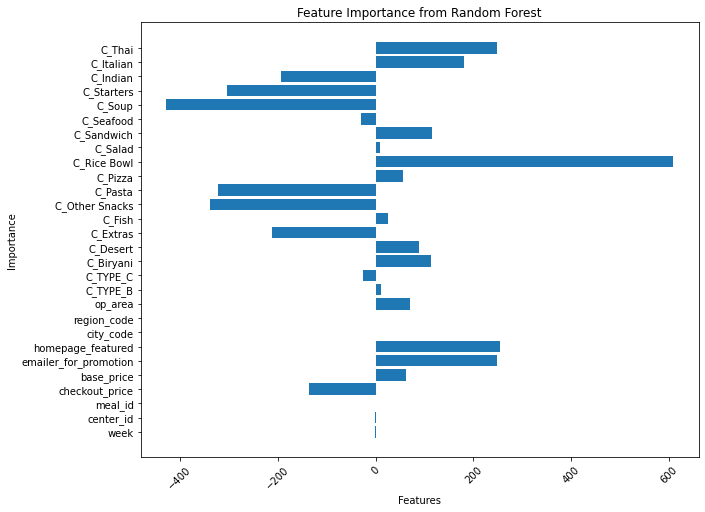

In [75]:
#Get the coefficients (feature importnace) of the linear regression model
coefficients=lr.coef_

#Plot the feature importance
columns=X_train.columns
plt.figure(figsize=(10,8))
plt.barh(columns, coefficients[0])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance from Random Forest')
plt.xticks(rotation=45)
plt.show()

The coefficients represent the impact of each feature on the target variable. For instance,
- checkout_price:indicating a significant negative impact of the checkout price on number of orders. 
- emailer_for_promotion and homepage_featured: indicating a substantial positive impact of them on number of ordedrs.
- op_area: suggesting a moderate positive impact of the operating area on numnber of orders.
- C_TYPE_B, C_Biryani, ... C_Thai: These are categorical variables representing center types, meal categories, and different types of cuisine. The coefficients for these variables represent their impact relative to the reference category. Positive coefficients indicate a positive impact on the number of orders relative to the reference category, while negative coefficients indicate a negative impact.

Overall, the magnitude of the coefficient indicates the strength of the impact, with larger coefficients having a more significant effect on the target variable. Features with positive coefficients contribute positively to the target, while those with negative coefficients have a negative impact. 

#### Define a new linear regression model with selected K best number of features 

Using all the features in the model may result in ovefitting. A subset of features can generalize the model better. 
- Feature selection involves choosing a subset of relevant features from the original set of features to improve model performance, reduce overfitting, and decrease computational complexity.
- When dealing with datasets with a large number of features, it's common for many features to be irrelevant or redundant. Removing irrelevant features reduces the dimensionality of the data, which can improve model performance and speed up training.
- Selecting the most informative features can lead to better model performance by focusing on the most relevant information for prediction. This can result in simpler and more interpretable models.
- Selecting a smaller subset of features makes the model more interpretable, as it's easier to understand the relationships between a smaller number of variables.
- Overall, feature selection is a useful method for selecting the most informative features from a dataset, leading to improved model performance, interpretability, and computational efficiency.

In [133]:
# Create a pipeline with feature selection (use a value of 15 for k) and linear regression
pipe = Pipeline([
    ('selector', SelectKBest(score_func=f_regression, k=15)),
    ('regression', LinearRegression())])

#train the model on the training data
start_time = time.time()
pipe.fit(X_train, y_train.values.ravel())
duration = time.time() - start_time

# Make predictions on the test set
y_pred=pipe.predict(X_test)

# Print the mean squared/absolute error and R2 for the best model
results(y_test,y_pred)

Mean Squared Error: 96827.32728912056
Mean Absolute Error: 179.24693866160877
R2 score:  0.3719228505762351
computation time: 1.03


The results show the model's performance slightly declined compared to the linear regression model. 
- When selecting a subset of features, discarding important features during this process can lead to a loss of valuable information, resulting in poorer model performance.
- The choice of scoring function and the value of k (number of features to select- defaulting to k=10)  may not be optimal for the dataset. If the selected features are not truly informative or relevant for predicting the target variable, it can negatively impact model performance.
- The dataset itself may not be well-suited for feature selection. In some cases, all features may be important for predicting the target variable, and removing any of them could lead to a decrease in model performance.

To address these issues, we can try the following:

- Experiment with different scoring functions to see if they lead to better results.
- Fine-tune hyperparameters of both the feature selection step and the linear regression model using techniques like grid search or randomized search.
- Consider using more advanced modeling techniques that can automatically learn feature importance, such as regularized regression methods or tree-based models like decision trees or random forests.

Now, we'll experiment with mutual_info_regression as our chosen scoring function.

In [77]:
# Create a pipeline with feature selection and linear regression
# use mutual_info_regression
pipe = Pipeline([
    ('selector', SelectKBest(score_func=mutual_info_regression)),
    ('regression', LinearRegression())])

#train the model on the training data
start_time = time.time()
pipe.fit(X_train, y_train.values.ravel())
duration = time.time() - start_time

# Make predictions on the test set
y_pred=pipe.predict(X_test)

# Print the mean squared/absolute error and R2 for the best model
results(y_test,y_pred)

Mean Squared Error: 111364.87134535199
Mean Absolute Error: 193.67105993262015
R2 score:  0.27762406648198334
computation time: 46.43


The performance of the model decreased, indicating that mutual_info_regression may not be an effective scoring function. 


As discussed before, we can now proceed with hyperparameter tuning for both the feature selection step and the linear regression model.

### Hyperparameter Tuning

Hyperparameter tuning is a crucial step in building machine learning models to improve their performance. 

In [117]:
#define a function to train the model on training data, make predictions on the test set using the best model,
#and print the results for the best model
def hypertuningresult(parameters,model):
#train the model on the training data
    start_time = time.time()
    model.fit(X_train,y_train.values.ravel())
    duration = time.time() - start_time

#print the best hyperparameters
    print('Best hyperparameter: ',model.best_params_)

# Make predictions on the test set using the best model
    best_model = model.best_estimator_
    y_pred = best_model.predict(X_test)

# Print the mean squared/absolute error and R2 for the best model
    print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
    print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
    print("R2 score: ", r2_score(y_test,y_pred))
    print('computation time: %.2f' % duration)

#### GridSearchCV

Grid search is a hyperparameter tuning technique used to discover the optimal values for a model's hyperparameters. The process entails defining a grid of hyperparameter values to explore, and it systematically evaluates every combination within this grid.
here, we'll experiment with different values of k and select the best k value to use in the SelectKBest method.

Traditional k-fold cross-validation is not suitable when working with time series data because it involves shuffling the data, potentially causing data leakage where information from the future is used to predict the past. Therefore, time series cross-validation is more appropriate, ensuring that the order of the data is respected during the splitting process. The TimeSeriesSplit() method is used to maintain the order of the data and helps prevent any inadvertent information leakage.

In [136]:
# Create a pipeline with feature selection and linear regression
pipeline = Pipeline([
    ('selector', SelectKBest(score_func=f_regression)),
    ('regression', LinearRegression())])

#Define the range of k and parameter grid for GridSearchCV 
k=[k+1 for k in range(len(X_train.columns))]
grid_params={'selector__k':k}

#Perform GridSerach
tss = TimeSeriesSplit(n_splits=10)
lr_grid_cv=GridSearchCV(pipeline,grid_params,cv=tss, n_jobs=-1)
lr_grid_cv.fit(X_train,y_train.values.ravel())

# Get the best parameters and best score
hypertuningresult(grid_params,lr_grid_cv)

Best hyperparameter:  {'selector__k': 27}
Mean Squared Error: 90299.04414992862
Mean Absolute Error: 169.20855709273206
R2 score:  0.41426901027608676
computation time: 17.10


The GridSearchCV result shows that the best hyperparameter found was to use all 27 features. 

The model exhibits similar performance in terms of R2 score, MAE, and MSE. Consequently, the feature selection technique employing SelectKBest with GridSearchCV did not enhance the linear regression model's performance in this scenario. Thus, opting for the simpler model without feature selection is preferable.


In the next step, we'll employ more advanced modeling techniques that can automatically learn feature importance, such as regularized regression methods.

#### Regulization 

Now, we aim to apply regularization techniques to assess feature importance and prevent overfitting by adding a penalty term to the loss function. This penalty term discourages overly complex models by penalizing large coefficient values.
By using regularization, the model is encouraged to focus on the most important features and avoid fitting noise in the data. 

There are different types of regularization techniques, such as L1 regularization (Lasso), and L2 regularization (Ridge). These techniques help to control the complexity of the model and reduce the risk of overfitting by shrinking the coefficients associated with less important features or by forcing some coefficients to be exactly zero.

#### Ridge Regression (L2 Regularization)

Ridge regression is a regularization technique used in linear regression models to address multicollinearity and overfitting. Ridge regression penalize large coefficients. By reducing overfitting and handling multicollinearity, ridge regression often leads to more accurate predictions on unseen data. 

In [80]:
# list of alpha to tune
grid_params = {'alpha': [ 0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 
                    10.0, 20, 50, 100, 500, 1000 ]}

#initialising Ridge() function
ridge = Ridge(random_state=42)

# Defining GridSearchCV 
tss = TimeSeriesSplit(n_splits=5)
grid_cv_model = GridSearchCV(estimator=ridge,
                       param_grid=grid_params,
                       cv=tss, n_jobs=-1)

hypertuningresult(grid_params,grid_cv_model)


Best hyperparameter:  {'alpha': 100}
Mean Squared Error: 90221.17724114693
Mean Absolute Error: 168.5664075467933
R2 score:  0.4147740993606591
computation time: 4.30


- Despite adjusting the hyperparameters, there was no significant impact on MSE or R2.
- while Ridge Regression is a powerful regularization technique, its effectiveness depends on various factors such as the nature of the dataset, the presence of multicollinearity, and the choice of hyperparameters. In this case, possibly exploring other regularization techniques could help improve model performance.
- The next step involves exploring Lasso regression.


#### Lasso Regression (L1 Regularization):

Lasso performs feature selection. It shrinks the coefficients of less important features to zero. Features which are not shrunk to zero are selected by Lasso. 

In [81]:
#Initializing Lasso()
lasso_reg=Lasso(random_state=42)

# Defining GridSearchCV and fiting GridSearchCV() with X_train and y_train
tss = TimeSeriesSplit(n_splits=5)
grid_cv_model=GridSearchCV(estimator=lasso_reg, param_grid=grid_params, cv=tss, n_jobs=-1)
grid_cv_model.fit(X_train,y_train)

hypertuningresult(grid_params,grid_cv_model)

Best hyperparameter:  {'alpha': 0.2}
Mean Squared Error: 90098.10803651864
Mean Absolute Error: 168.0210199167147
R2 score:  0.4155723962608098
computation time: 14.33


Similar to the Ridge regression results, the hyperparameter adjustment in Lasso regression did not result in a significant change in the model performance. The lack of improvement in the above models could be attributed to a combination of factors related to the dataset characteristics, the choice of hyperparameters, and the inherent limitations of the linear regression approach.

Considering the minimal improvement achieved through regularization techniques, it prompts us to question the suitability of the linear regression model for accurately predicting the 'Number of Orders.' To enhanced the model performance, we will explore the implementation of a Decision Tree Regressor in the next step.

## 2-Decision Tree Regressor

By using a decision tree regressor, we can capture non-linear relationships between features and number of orders, which may improve the predictive performance compared to the linear regression. 

Additionally, decision trees are interpretable, allowing us to understand the decision-making process of the model.

In [83]:
#creat a decision tree regressor
DTRModel= DecisionTreeRegressor(random_state=42)

#train the model on the training data
start_time = time.time()
DTRModel.fit(X_train,y_train)
duration = time.time() - start_time
#make prediction on the test set
y_pred=DTRModel.predict(X_test)

#evaluate the model performance
results(y_test,y_pred)

Mean Squared Error: 81154.59898992283
Mean Absolute Error: 126.2734367010439
R2 score:  0.4735850857060001
computation time: 1.81


In [84]:
# print the Depth of the DecisionTree and Number of Leaves
print('DecisionTree_Depth:',DTRModel.get_depth(),'DecisionTree_n_leaves:',DTRModel.get_n_leaves())

DecisionTree_Depth: 52 DecisionTree_n_leaves: 279579


The decision tree model demonstrates better performance compared to the linear regression model in several aspects:
- It achieves lower mean squared error (MSE) and mean absolute error (MAE), indicating more accurate predictions.
- Additionally, the decision tree model exhibits slightly higher R2 score, suggesting that it explains a larger portion of the variance in the target variable.
- This improvement can be attributed to the decision tree's ability to capture complex, non-linear relationships between features and the target variable, which may be challenging for linear regression.
- Moreover, decision trees offer greater flexibility, enabling them to adapt to complex data patterns and interactions among features.
- Overall, the decision tree model's lower error metrics, higher R2 score, and flexibility contribute to its better performance over linear regression.

#### Variable importance

We want to conduct a feature importance analysis to assign a score to each feature within the dataset. The importance score represents how much each feature contributes to reducing the impurity (or variance) in the target variable within the decision tree. 

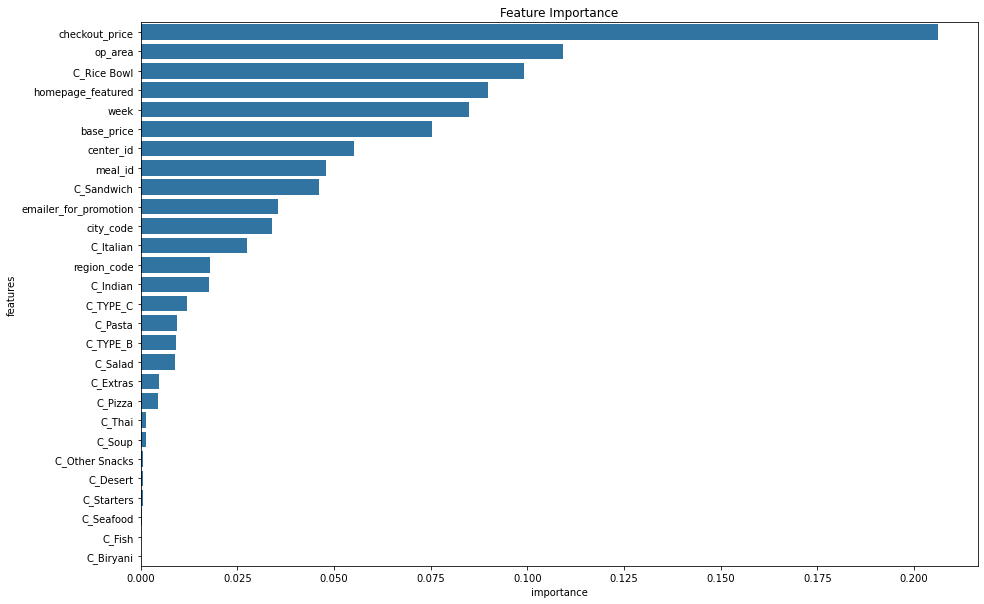

In [137]:
# Get feature importances
importances_DT = DTRModel.feature_importances_

#Create a dataframe with feature names and their importances
#and sort feature importances in descending order
feature_importance_DT=pd.DataFrame({'Feature': X_train.columns,'Importance': importances_DT})
feature_importance_DT=feature_importance_DT.sort_values(by='Importance',  ascending=False)

# Plot feature importances
plt.figure(figsize=(15, 10))
plt.title("Feature Importance")
#plt.bar(range(X_train.shape[1]), importances[indices])
#plt.xticks(range(X_train.shape[1]), names, rotation=90)
sns.barplot(x='Importance', y='Feature', data=feature_importance_DT)
plt.title('Feature Importance')                               
plt.ylabel('features')
plt.xlabel('importance')
plt.show()

The figure presents the feature importance computed from a decision tree model.
- A higher importance value indicates that the feature plays a more significant role in making predictions, while a lower value suggests lesser relevance.
- For example, the feature "checkout_price" has the highest importance score of 0.21, indicating that it has the most substantial impact on the model's predictions. Conversely, features like "C_Seafood," "C_Fish," and "C_Biryani" have very low importance scores, suggesting they contribute minimally to the model's predictive power.

Although we achieved better performance with the decision tree model, it's important to note that decision trees can be prone to overfitting. Therefore, we may need to tune hyperparameters or explore ensemble methods like random forest to further improve performance. Taking these steps will help address potential overfitting issues and enhance the overall effectiveness of the model.

### Hyperparameter tunning

For decision trees, there are several hyperparameters that can be tuned to improve model performance. "max_depth", "min_samples_split", and "max_leaf_nodes" are some common hyperparameters that we tuned here. By adjusting these hyperparameters using techniques like random search, we may find the combination that results in better performance for the decision tree model.

#### Randomised Search

In Randomized Search, instead of exhaustively evaluating all possible combinations of hyperparameter values, a fixed number of random combinations is sampled from the specified hyperparameter space. We'll consider 100 random combinations of hyperparameter values.

In [147]:
# Defining RandomizedSearchCV
random_cv_DT = RandomizedSearchCV(DecisionTreeRegressor(random_state=42), grid_param_DT, cv=tss, n_iter=100, random_state=42, n_jobs=-1)

hypertuningresult(grid_param_DT,random_cv_DT)

Best hyperparameter:  {'min_samples_split': 2, 'max_leaf_nodes': None, 'max_depth': 11}
Mean Squared Error: 67095.80742343633
Mean Absolute Error: 120.9593486383092
R2 score:  0.5647784086927623
computation time: 47.63


In [148]:
#Finding the Depth and Number of Leaves for Randomised Search
best_model=random_cv_DT.best_estimator_
print('Randomserach_Depth:',best_model.get_depth(),'RandomSerach_n_leaves:',best_model.get_n_leaves())

Randomserach_Depth: 11 RandomSerach_n_leaves: 1616


- The decision tree model with default parameters (max_depth=None, max_leaf_nodes=None, min_samples_split=2) yielded the higher Mean Squared Error (MSE) of 81154.59.
It also resulted in the higher Mean Absolute Error (MAE) of 126.27 and a lower R2 score of 0.473 compared to the tuned models.
Moreover, this default model exhibited an extremely large depth of 52 and an exceptionally high number of leaves (279,579), suggesting overfitting.
- Random search hyperparameter tuning selected the best hyperparameters {'max_depth': 11, 'max_leaf_nodes': None, 'min_samples_split': 2}, resulting in a notably improved MSE of 67095.81.
This led to a lower MAE of 120.96 and a higher R2 score of 0.565 compared to the default decision tree model.
Furthermore, the random search achieved a more reasonable depth of 11 and a significantly reduced number of leaves (1,616), indicating better generalization and effective control over model complexity.

In summary, random search led to a model with better performance by avoiding excessive complexity, suggesting better generalization, and reducing overfitting compared to the default model.

In the next step, we'll explore ensemble methods like random forest to assess potential improvements in model performance.

### Random Forest model

- Random Forest is an ensemble learning method that constructs multiple decision trees and aggregates their predictions.
- It can capture more complex relationships in the data compared to individual decision trees.
- Random Forest offers improved generalization and reduced overfitting compared to standalone decision trees.
- With the ability to handle a large number of features and robustness to noisy data, Random Forest is a valuable technique for enhancing predictive accuracy and model generalization.

In [89]:
# Initialize the  regressor 
rf=RandomForestRegressor(random_state=42)
    
#Trian the model on the the training data
start_time = time.time()
rf.fit(X_train,y_train.values.ravel())
duration = time.time() - start_time

#Make predictions on the testing data
y_pred=rf.predict(X_test)

#Print the performance of the model- Mean squared error,Mean absolute error, R-squared (MSE, MAE, and R2), and computation time
results(y_test,y_pred)

Mean Squared Error: 45037.019751405365
Mean Absolute Error: 98.67577128517371
R2 score:  0.7078642592339451
computation time: 116.30


- The Random Forest model has lower Mean Squared Error (MSE) and Mean Absolute Error (MAE) compared to the Decision Tree model. This indicates that the Random Forest model's predictions are closer to the actual values on average.

- The R2 score of the Random Forest model is also higher, indicating that a larger proportion of the variance in the target variable is explained by the features in the Random Forest model compared to the Decision Tree model.

- Although the Random Forest model took longer to compute compared to the Decision Tree model, the improved performance justifies the additional computational cost. The increase in computation time is often considered acceptable when the model provides significantly better results.

Overall, the Random Forest model's superior performance can be attributed to its ability to combine multiple decision trees and mitigate overfitting, resulting in more accurate predictions and better generalization to unseen data compared to a single Decision Tree model.

#### Variable Importance

Variable importance in a random forest model can be assessed using various techniques. One common method is to calculate the mean decrease in impurity (MDI) or the mean decrease in accuracy (MDA) for each feature.

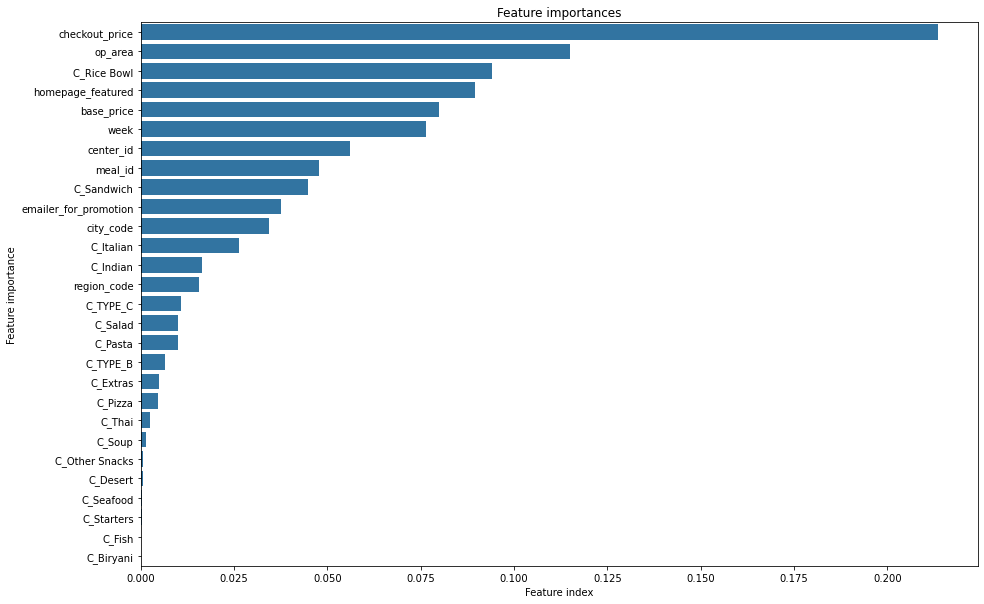

In [143]:
# Get feature importances
importances = rf.feature_importances_

#Create a dataframe with feature names and their importances
#and sort feature importances in descending order
feature_importance=pd.DataFrame({'Feature': X_train.columns,'Importance': importances})
feature_importance=feature_importance.sort_values(by='Importance',  ascending=False)

# Plot feature importances
plt.figure(figsize=(15,10))
plt.title("Feature importances")
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.xlabel("Feature index")
plt.ylabel("Feature importance")
plt.show()

This table displays the feature importance values for various features in the dataset. 
- The importance of each feature is determined based on its contribution to reducing the impurity or variance in the target variable within the decision tree model. Features with higher importance values are considered more influential in making predictions, while those with lower values are deemed less relevant. 
- Notably, features like 'checkout_price', 'op_area', 'C_Rice Bowl', and 'homepage_featured' exhibit higher importance, indicating their greater influence on the target variable.
- Conversely, features such as 'C_Seafood', 'C_Starters', 'C_Fish', and 'C_Biryani' demonstrate minimal importance, suggesting lesser relevance in predicting the target variable.

To further improve the Randon Forest model, we consider the following:
- Hyperparameter Tuning: Experiment with different values for hyperparameters. We can use techniques like Random Search to find the optimal combination of hyperparameters that maximize model performance.
- Ensemble Methods: Try other ensemble methods such as XGBoost or AdaBoost, which may offer complementary advantages to Random Forests and potentially improve performance further.

#### Hyperparameter Tuning

While the random forest model demonstrates better performance on the test set, there is room for further improvement through fine-tuning the hyperparameters. It's crucial to strike a balance between enhancing model performance and maintaining its complexity.
We will experiment with different values, including the number of trees in the forest (n_estimators), the maximum depth of the trees (max_depth), and the minimum number of samples required to split a node (min_samples_split).

We'll employ Randomized Search, which randomly samples a subset of hyperparameter combinations. We'll consider the defult value 10 random combinations of hyperparameter values. Subsequently, we'll compare the results of the best model with those obtained using the default hyperparameter values to determine any improvements.

#### Randomised Search

In [149]:
#setup hyperparameters range for tuning 
grid_param_RFr={'n_estimators':[10, 20, 50, 100],
    'max_depth': [None, 10, 50, 100],
    'min_samples_split': [2, 5, 10],
  }

In [150]:
# Defining RandomizedSearchCV
random_cv_RF = RandomizedSearchCV(RandomForestRegressor(random_state=42), grid_param_RFr, cv=tss, random_state=42, n_jobs=-1)

hypertuningresult(grid_param_RFr,random_cv_RF)

/Users/Arezoo/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best hyperparameter:  {'n_estimators': 50, 'min_samples_split': 2, 'max_depth': 50}
Mean Squared Error: 44772.200141810434
Mean Absolute Error: 98.81702640832606
R2 score:  0.7095820299311497
computation time: 515.61


The Random Forest model with RandomSearch hyperparameter tuning produced slightly better results compared to the default Random Forest model. However, this improvement comes at the cost of increased computation time, which more than quadrupled compared to the default model. 


Now, we will try the XGBoost model and compare the results to determine if there is an improvement in model performance.

### XGBoost model

XGBoost is a machine learning algorithm belonging to the gradient boosting family. It follows a framework where an ensemble of weak learners, typically decision trees, is constructed sequentially. Each tree corrects errors from the preceding ones, resulting in a robust predictive model. 

XGBoost incorporates regularization techniques to prevent overfitting and employs tree pruning during construction. Initially building deep trees, it then prunes them backward, removing branches that do not significantly contribute to model performance, effectively controlling overfitting.

The learning rate, or shrinkage, parameter in XGBoost determines each tree's contribution to the final prediction. Lower learning rates enhance model robustness but may necessitate more trees. Designed for efficiency and speed, XGBoost supports parallel and distributed computing, making it scalable for large datasets. 

In summary, XGBoost excels in predictive performance, speed, and robustness, potentially capturing patterns overlooked by other models such as Random Forest or linear regression. It's worth experimenting with it to see if it can further enhance our model.

In [151]:
# Initialize the  regressor 
xgbr= xgb.XGBRegressor(random_state=42)
    
#Trian the model on the the training data
start_time = time.time()
xgbr.fit(X_train,y_train.values.ravel())
duration = time.time() - start_time

#Make predictions on the testing data
y_pred=xgbr.predict(X_test)

# Print the mean squared/absolute error and R2 for the best model
results(y_test,y_pred)

Mean Squared Error: 53446.61902673073
Mean Absolute Error: 118.63686308823999
R2 score:  0.6533148124143386
computation time: 1.64


Although the random forest model exhibits better performance than the XGBoost model, the computation time for XGBoost is significantly lower. Therefore, while Random Forest demonstrates superior predictive accuracy, XGBoost stands out for its computational efficiency, making it a potential choice.

#### Variable Importance

Variable importance in XGBoost allows us to understand the contribution of each feature to the model's predictions effectively. The model calculates importance scores based on how often a feature is used to split the data across all trees in the ensemble and how much each split improves the model's performance. Higher importance scores suggest that a feature plays a more critical role in making accurate predictions. By analyzing variable importance in XGBoost, we gain insights into which features significantly impact the model's decision-making process. 

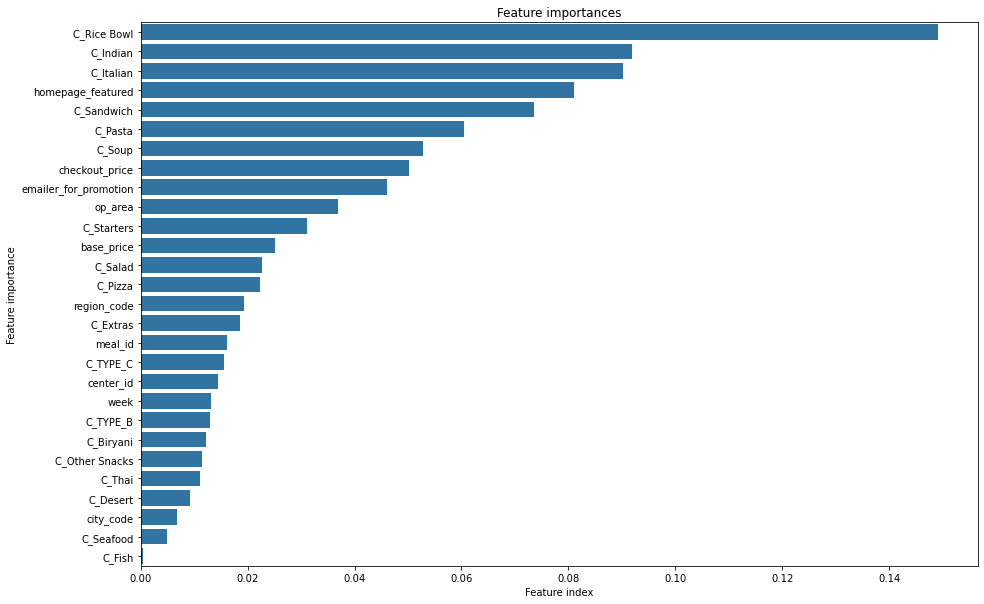

In [152]:
# Get feature importances
importances_xgbr = xgbr.feature_importances_

#Create a dataframe with feature names and their importances
#and sort feature importances in descending order
feature_importance_xgbr=pd.DataFrame({'Feature': X_train.columns,'Importance': importances_xgbr})
feature_importance_xgbr=feature_importance_xgbr.sort_values(by='Importance',  ascending=False)

# Plot feature importances
plt.figure(figsize=(15,10))
plt.title("Feature importances")
sns.barplot(x='Importance', y='Feature', data=feature_importance_xgbr)
plt.xlabel("Feature index")
plt.ylabel("Feature importance")
plt.show()

The feature importance figure indicates the contribution of each feature to the predictive performance of the model. Higher importance values suggest that the corresponding features have a more significant impact on the model's predictions. 

In this case, the top five features with the highest importance are "C_Rice Bowl", "C_Indian", "C_Italian", "homepage_featured", and "C_Sandwich". These features play a crucial role in determining the number of orders. For instance, the presence of certain food categories like rice bowls, Indian and Italian dishes, and sandwiches has a substantial positive influence, while the "homepage_featured" feature, indicating whether a meal is featured on the homepage, also contributes significantly. 

On the other hand, features like "C_Desert", "city_code", "C_Seafood", and "C_Fish" have comparatively lower importance, suggesting a lesser impact on the model's predictions. Understanding feature importance helps in identifying key factors driving demand and aids in making informed decisions for optimizing business strategies.

### Hyperparameter Tuning

Common hyperparameters for XGBoost that we tuned here include 'n_estimators,' 'learning_rate,' 'max_depth,' 'min_child_weight,' 'gamma,' and 'colsample_bytree.

### Randomised Search

In [94]:
#perform randomized hyperparameter search for XGBRegressor
params = {
    'n_estimators': [None,10, 20, 50, 100],
    'learning_rate': [None,0.001, 0.01, 0.1, 0.2, 0.3],
    'max_depth': [None, 10, 50, 100],
    'min_child_weight': [None,0.5, 1.0, 3.0, 5.0],
    'gamma': [None,0, 0.25, 0.5, 1.0],   
    'colsample_bytree': [None,0.5, 0.7, 0.8, 0.9, 1]
}
tss = TimeSeriesSplit(n_splits=5)
xgbcv = RandomizedSearchCV(xgbr, params, cv=tss, n_jobs=-1)

hypertuningresult(params,xgbcv)

Best hyperparameter:  {'n_estimators': 50, 'min_child_weight': 0.5, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 1.0, 'colsample_bytree': 0.7}
Mean Squared Error: 39368.73514978159
Mean Absolute Error: 95.84659023028861
R2 score:  0.7446319789922338
computation time: 245.36


The results from XGBoost with hyperparameter tuning using randomized search demonstrate improvement over the default XGBoost model. The best hyperparameters, including the number of estimators, minimum child weight, maximum depth, learning rate, gamma, and colsample by tree, were optimized, resulting in a lower Mean Squared Error, Mean Absolute Error, and a higher R2 score. The computation time increased due to the extensive search for optimal parameters, but the enhancement in predictive performance justifies the additional computational investment. The tuned XGBoost model with randomized search outperforms the default XGBoost model and presents a compelling choice for accurate and efficient predictions.

## Final Model Selection

In summary, the modeling process involved exploring various algorithms, including linear regression, decision tree, random forest, and XGBoost. Each model underwent hyperparameter tuning to optimize its performance. The linear regression model, while straightforward, may not capture complex relationships in the data. The decision tree model exhibited improvements in predictive accuracy compared to linear regression. However, both random forest and XGBoost surpassed the individual decision tree model. Random forest demonstrated strong predictive accuracy, but XGBoost, with hyperparameter tuning, outperformed all models, showcasing a lower Mean Squared Error, Mean Absolute Error, and a higher R2 score.

The selection of the best model depends on the specific requirements of the problem. If computational efficiency is a priority, the random forest model with default setting might be preferred due to its respectable performance and relatively lower computation time. However, if maximizing predictive accuracy is paramount and computational resources allow, the tuned XGBoost model stands out as the top performer among the considered algorithms. It's essential to balance predictive performance, computational efficiency, and model interpretability when choosing the most suitable model. 

We will utilize the tuned XGBoost model as our preferred choice.

In [175]:
# Initialize the  regressor (using the tunned XGBoost model)
xgbr_f= xgb.XGBRegressor(n_estimators= 50, min_child_weight= 0.5, max_depth= 10, learning_rate= 0.1, gamma= 1.0, colsample_bytree=0.7,random_state=42)
    
#Trian the model on the the training data
start_time = time.time()
xgbr_f.fit(X_train,y_train.values.ravel())
duration = time.time() - start_time

#Make predictions on the testing data
y_pred_f=xgbr_f.predict(X_test)

# Print the mean squared/absolute error and R2 for the best model
results(y_test,y_pred_f)

Mean Squared Error: 39368.73514978159
Mean Absolute Error: 95.84659023028861
R2 score:  0.7446319789922338
computation time: 1.85


#### Refit the model using all the training data and test it on the test dataset

In this step, we aim to refit the model using the entire training set and subsequently utilize the updated model to predict the number of orders for the test set.

In [210]:
# Load the test data 
food_orders_c_test = pd.read_csv('../Data/food_data_merged_c_test.csv')
# Standardize numerical features
numerical_features = ['checkout_price', 'base_price', 'op_area']
# Making a Scaler object
scaler = StandardScaler()
#Create X and y from the test set
test_X=food_orders_c_test.drop(columns=['id','num_orders'])
test_X[numerical_features] = scaler.fit_transform(test_X[numerical_features])
test_y=food_orders_c_test['num_orders']

In [211]:
#Create X and y for the entire tarining set
train_X=food_orders_c.drop(columns=['id','num_orders'])
train_X[numerical_features] = scaler.fit_transform(train_X[numerical_features])
train_y=food_orders_c['num_orders']

In [212]:
# Initialize the  regressor (using the tunned XGBoost model)
xgbr_f= xgb.XGBRegressor(n_estimators= 100, min_child_weight= 3.0, max_depth= 10, learning_rate= None, gamma= 0.25, colsample_bytree=0.7,random_state=42)
    
#Trian the model on the the training data
start_time = time.time()
xgbr_f.fit(train_X,train_y.values.ravel())
duration = time.time() - start_time

#Make predictions on the testing data
y_pred_f=xgbr_f.predict(test_X)

# Print the mean squared/absolute error and R2 for the best model
results(test_y,y_pred_f)

Mean Squared Error: 22870.37871623268
Mean Absolute Error: 91.17810455652535
R2 score:  0.7010566684528506
computation time: 3.25


The model seems to generalize well to unseen data, indicated by the lower MSE and MAE on the larger dataset. However, the slight reduction in thr R2 score suggests that the model's explanatory power is marginally compromised when applied to the larger dataset.
It's important to acknowledge that estimates of model performance are susceptible to the noise and uncertainty inherent in the data.

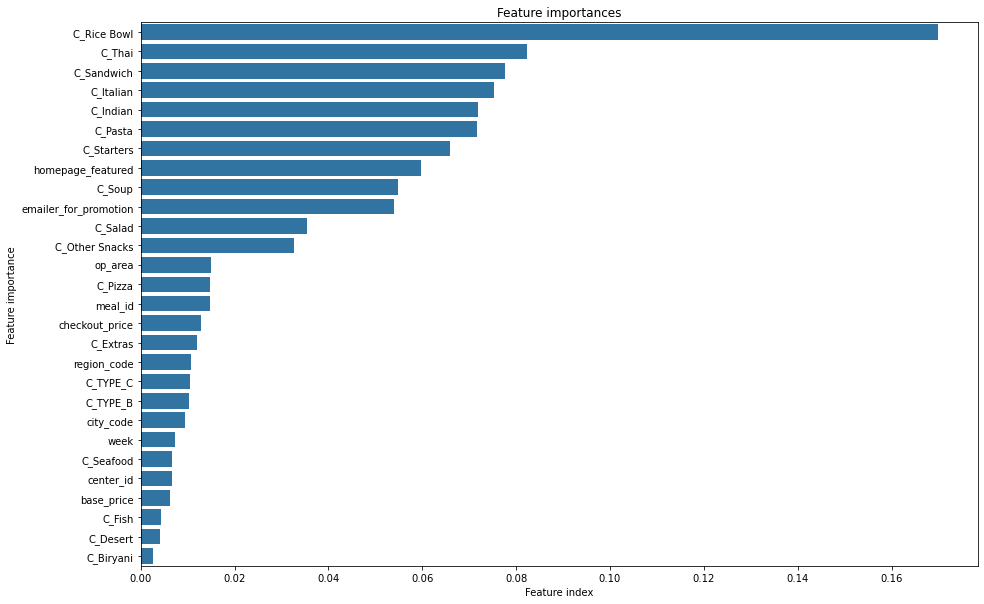

In [213]:
# Get feature importances
importances_xgbr_f = xgbr_f.feature_importances_

#Create a dataframe with feature names and their importances
#and sort feature importances in descending order
feature_importance_xgbr_f=pd.DataFrame({'Feature': train_X.columns,'Importance': importances_xgbr_f})
feature_importance_xgbr_f=feature_importance_xgbr_f.sort_values(by='Importance',  ascending=False)

# Plot feature importances
plt.figure(figsize=(15,10))
plt.title("Feature importances")
sns.barplot(x='Importance', y='Feature', data=feature_importance_xgbr_f)
plt.xlabel("Feature index")
plt.ylabel("Feature importance")
plt.show()

Features that came up important in the modeling included:
- meal_category and cuisine: features like C_Rice_Bowl, and C_Thai, among others, indicate that their presence significantly influences the predictions.
- homepage_featured and emailer_for_promotion: They seem to be significant contributors to the model, indicating that whether a meal is featured on the homepage or promoted via email strongly influences the predictions.
- op_area and checkout_price: These numerical features have a moderate impact on predictions.

Other Features like region_code, center_type, city_code, week, center_id, and base_price contribute to the model's predictions but are not among the important features.

##### Check for abnormal predictions

In [188]:
#Check for negative predictions
negative_y_percentage=(y_pred_f<0).mean()*100
negative_y_percentage

2.0505164376466287

It's not uncommon to get negative predicted values (around 2%), especially in regression where the model tries to estimate continuous numeric values. Negative predictions can occur when the model extrapolates beyond the range of the training data or when dealing with complex relationships in the data.
One approach to address negative predictions is to clip them. Predictions can be clipped to be within a certain range. For instance, we know that our target variable should be non-negative, so we can set any negative predictions to zero. This helps ensure the predictions align with the specific context of the problem, making them more interpretable and consistent with domain knowledge.

In [189]:
#change the negative value to zero
y_pred_f = np.clip(y_pred_f, 0, None)

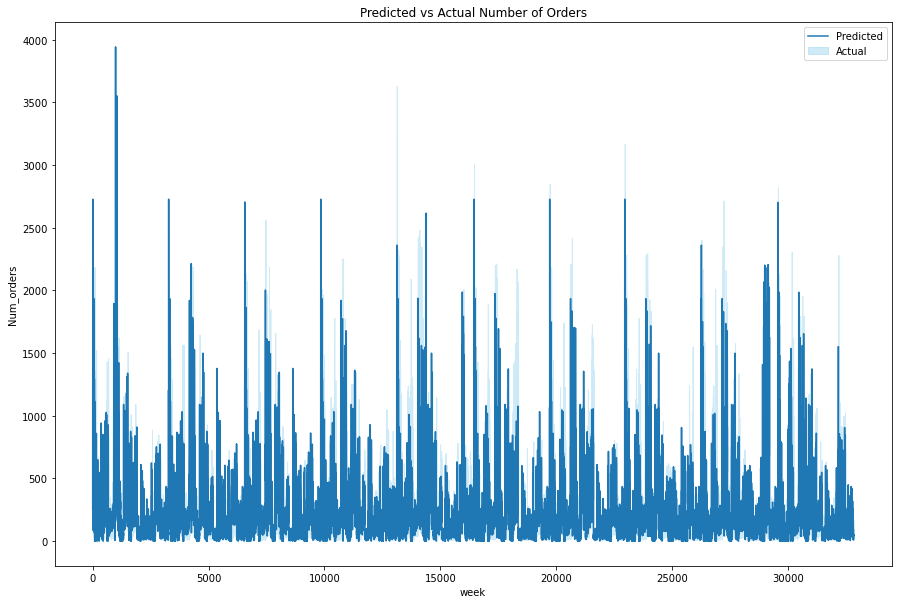

In [190]:
# Create a range of indices for the x-axis
x = range(len(y_pred_f))
    
# Plot the predicted values (y_pred) and the true values (y_test)
plt.figure(figsize=(15, 10))
plt.plot(x, y_pred_f, label='Predicted')
#plt.plot(x, test_y.to_numpy(), label='Actual')

# Plot predicted values above actual values
#plt.fill_between(x, test_y.to_numpy(), y_pred_f, color='skyblue', alpha=0.4, label='Predicted')
plt.fill_between(x, y_pred_f, test_y, color='skyblue', alpha=0.4, label='Actual')

# Set labels and title
plt.ylabel('Num_orders')
plt.xlabel('week')
plt.title('Predicted vs Actual Number of Orders')
    
# Add legend
plt.legend()
    
# Show the plot
plt.show()

The above figure shows the actual vs. predicted number of orders for weeks, center IDs, and meal IDs. Now, we want to check the prediction of the number of orders for each week, center ID, and meal ID separately.

In [194]:
#create a data frame with week, center_id, meal_id, predicted, and actual number of orders
pred_act=pd.DataFrame(y_pred_f)
pred_act['Actual']=test_y
pred_act['week']=food_orders_c_test['week']
pred_act['center_id']=food_orders_c_test['center_id']
pred_act['meal_id']=food_orders_c_test['meal_id']
pred_act = pred_act.rename(columns={0: 'Predicted'})
#Weekly Total Number of Orders
weekly_actual_f =pred_act.groupby('week')['Actual'].sum()
weekly_predicted_f =pred_act.groupby('week')['Predicted'].sum()

In [200]:
#Define a function to plot Predicted vs Actual Number of orders
def plot_Act_Pred(actual,predicted,xlabel,title):
    # Plot the predicted values (y_pred) and the true values (y_test)
    plt.figure(figsize=(15, 10))
    plt.plot(actual.index.to_numpy(), actual.values, label='Actual')
    plt.plot(predicted.index.to_numpy(), predicted.values, label='Predicted')
    #plt.plot(x, pred_act['Predicted'].values, label='Predicted')
    #plt.plot(x, pred_act['Actual'].values, label='Actual')
    
    # Set labels and title
    plt.ylabel('Num_orders')
    plt.xlabel(xlabel)
    plt.title(title)
    
    # Add legend
    plt.legend()
    
    # Show the plot

    plt.show()

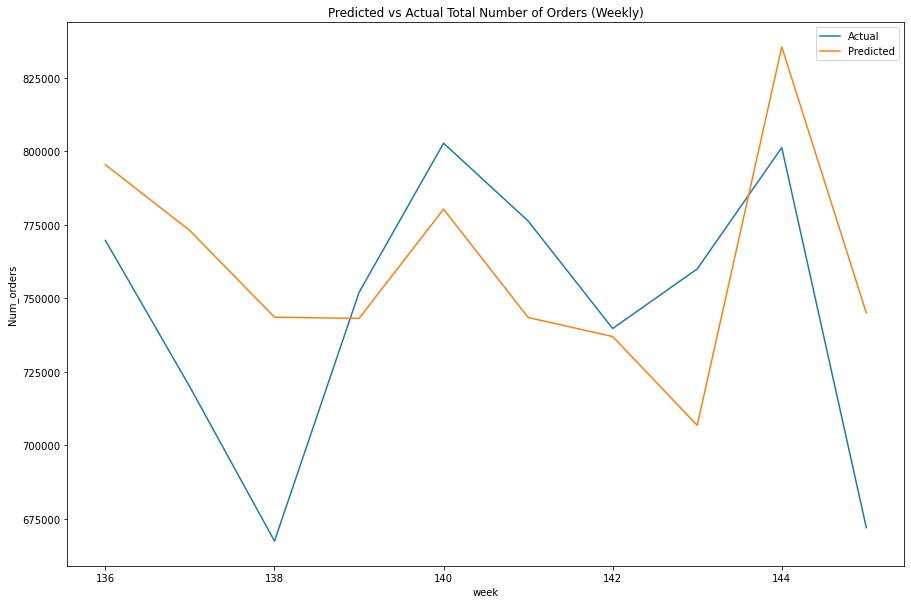

In [207]:
plot_Act_Pred(weekly_actual_f,weekly_predicted_f,'week','Predicted vs Actual Total Number of Orders (Weekly)')

In [202]:
#center_id
center_actual_f =pred_act.groupby('center_id')['Actual'].sum()
center_predicted_f =pred_act.groupby('center_id')['Predicted'].sum()

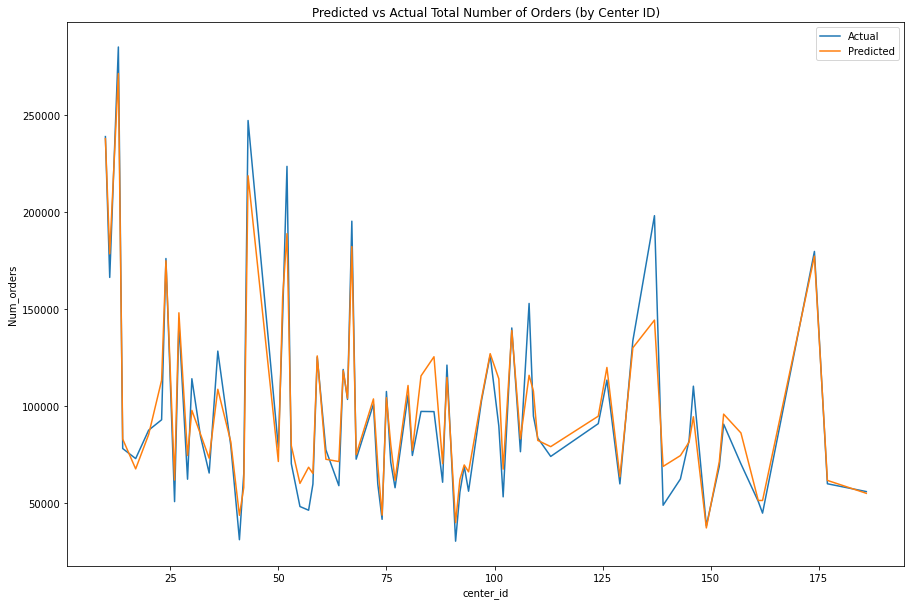

In [208]:
plot_Act_Pred(center_actual_f,center_predicted_f,'center_id','Predicted vs Actual Total Number of Orders (by Center ID)')

In [205]:
#meal_id
meal_actual_f =pred_act.groupby('meal_id')['Actual'].sum()
meal_predicted_f =pred_act.groupby('meal_id')['Predicted'].sum()

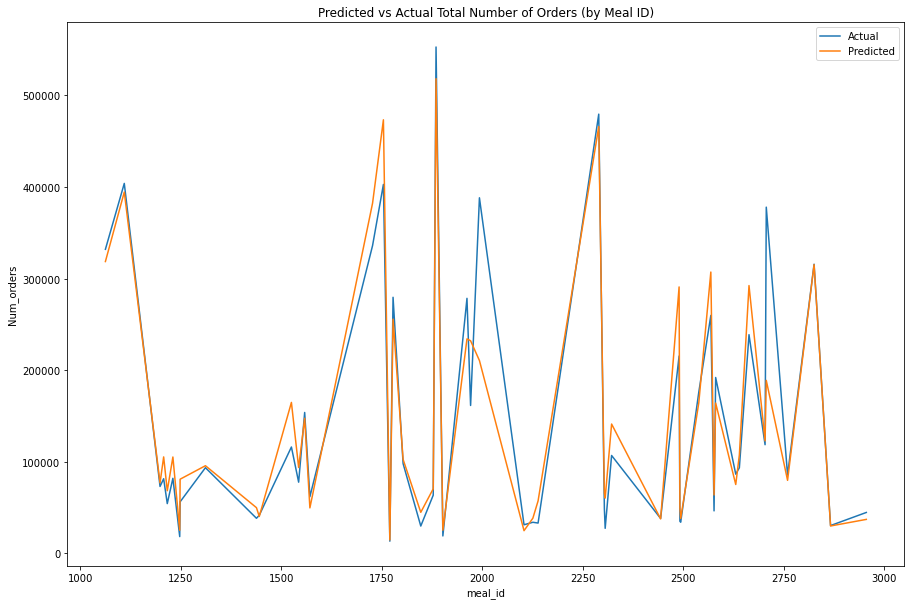

In [206]:
plot_Act_Pred(meal_actual_f,meal_predicted_f,'meal_id','Predicted vs Actual Total Number of Orders (by Meal ID)')

The above figures represent the actual vs. predicted number of orders for weeks, center IDs, and meal IDs. The model seems to capture the overall behavior of the data, and we observe a quite good match between the predicted and actual values.

### Future direction:
While the presented models strike a balance between performance and computation time, it's essential to consider avenues for further improvement:

- Utilizing more data: Currently, we have data spanning three years. Exploring additional data from another year or two can enhance the model's predictive capabilities.

- Incorporating feature engineering: Employing advanced feature engineering techniques can contribute to refining the model's performance.

- Exploring other ensemble models: Experimenting with alternative ensemble models, such as the Adaboost model, could provide valuable insights and potentially lead to improved results.